In [8]:
%load_ext autoreload
%autoreload 2
from modelling_helper import *
from correlation_analysis_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load datasets

In [45]:
(X_train, X_test, y_train, y_test), (X_pca_train, X_pca_test, y_pca_train, y_pca_test) = read_combined_dataset()
(X_a3_train, X_a3_test, y_a3_train, y_a3_test), (X_a3_pca_train, X_a3_pca_test, y_a3_pca_train, y_a3_pca_test) = read_a3_dataset()
(X_a4_train, X_a4_test, y_a4_train, y_a4_test), (X_a4_pca_train, X_a4_pca_test, y_a4_pca_train, y_a4_pca_test) = read_a4_dataset()

In [23]:
X_list,X_list_pca, X_list_pruned, y_list = load_each_subject_individually_modelling()
y_list = [y.flatten() for y in y_list]

now laoding a3 participants
loaded P20 a3, x shape is (1391, 46), y shape is (1391, 1)
loaded P26 a3, x shape is (1445, 46), y shape is (1445, 1)
loaded P19 a3, x shape is (1589, 46), y shape is (1589, 1)
loaded P47 a3, x shape is (1908, 46), y shape is (1908, 1)
loaded P29 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P9 a3, x shape is (1560, 46), y shape is (1560, 1)
loaded P34 a3, x shape is (1461, 46), y shape is (1461, 1)
loaded P25 a3, x shape is (1076, 46), y shape is (1076, 1)
loaded P11 a3, x shape is (1792, 46), y shape is (1792, 1)
loaded P30 a3, x shape is (1385, 46), y shape is (1385, 1)
loaded P42 a3, x shape is (1473, 46), y shape is (1473, 1)
loaded P28 a3, x shape is (1350, 46), y shape is (1350, 1)
loaded P3 a3, x shape is (1366, 46), y shape is (1366, 1)
loaded P13 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P24 a3, x shape is (1515, 46), y shape is (1515, 1)
loaded P12 a3, x shape is (1334, 46), y shape is (1334, 1)
loaded P5 a3, x shape is (3832

Autoencoder

In [10]:
x_train_scaled = X_train
x_test_scaled = X_test

# 1. Define the Autoencoder Architecture

input_dim = x_train_scaled.shape[1]  # Number of features
encoding_dim = 2  # Size of the latent space (adjust as needed)

# Input layer
input_layer = Input(shape=(input_dim, ))
# Encoder layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)  # Latent representation
# Decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)  # Reconstructed output


# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [12]:
# 3. Train the Autoencoder

# early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = autoencoder.fit(
    x_train_scaled, x_train_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test_scaled, x_test_scaled),
    callbacks=[early_stopping]
)

Epoch 1/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - loss: 0.2362 - val_loss: 0.2785
Epoch 2/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - loss: 0.2372 - val_loss: 0.2780
Epoch 3/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - loss: 0.2471 - val_loss: 0.2819
Epoch 4/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - loss: 0.2419 - val_loss: 0.2772
Epoch 5/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.2383 - val_loss: 0.2827
Epoch 6/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - loss: 0.2533 - val_loss: 0.2826
Epoch 7/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - loss: 0.2424 - val_loss: 0.3097
Epoch 8/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - loss: 0.2519 - val_loss: 0.2728
Epoch 9/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 0.2329 - val_loss: 0.2744
Epoch 10/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - loss: 0.2635 - val_loss: 0.2702
Epoch 11/100
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - loss: 0.2416 - val_loss: 0.27

In [11]:
# 4. Evaluate the Autoencoder

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Reconstruct the input data
x_train_reconstructed = autoencoder.predict(x_train_scaled)
x_test_reconstructed = autoencoder.predict(x_test_scaled)

NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>

In [12]:
# 5. Extract Encoded Features
# ===========================

# Define the encoder model to extract the latent features
encoder = Model(inputs=input_layer, outputs=encoded)

# Encode the data
x_train_encoded = encoder.predict(x_train_scaled)
x_test_encoded = encoder.predict(x_test_scaled)

1568/1568 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step


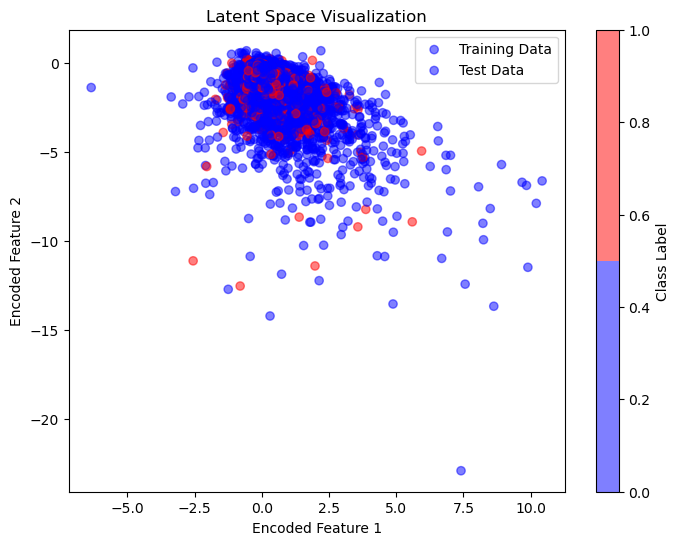

In [13]:
# 6. Visualize the Latent Space (if encoding_dim == 2)
# ===========================

if encoding_dim == 2:
    plt.figure(figsize=(8, 6))
    cmap = ListedColormap(['blue', 'red'])
    plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_train, cmap=cmap, alpha=0.5, label='Training Data')
    plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap=cmap, alpha=0.5, label='Test Data')
    plt.xlabel('Encoded Feature 1')
    plt.ylabel('Encoded Feature 2')
    plt.title('Latent Space Visualization')
    plt.colorbar(label='Class Label')
    plt.legend()
    plt.show()

In [27]:
# Classification Using Encoded Features

# Train a classifier on the encoded training data
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_encoded, y_train)

# Predict on the encoded test data
y_pred_encoded = clf.predict(x_test_encoded)

# Evaluate the classifier
print('Classification Report Using Encoded Features:')
print(classification_report(y_test, y_pred_encoded))

Classification Report Using Encoded Features:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     10687
           1       0.17      0.03      0.06      1852

    accuracy                           0.83     12539
   macro avg       0.51      0.50      0.48     12539
weighted avg       0.75      0.83      0.78     12539



In [28]:

# Comparison: Classification Using Original Features

# Train a classifier on the original scaled training data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(x_train_scaled, y_train)

# Predict on the original scaled test data
y_pred_original = clf_original.predict(x_test_scaled)

# Evaluate the classifier
print('Classification Report Using Original Features:')
print(classification_report(y_test, y_pred_original))

Classification Report Using Original Features:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10687
           1       0.72      0.03      0.06      1852

    accuracy                           0.86     12539
   macro avg       0.79      0.52      0.49     12539
weighted avg       0.84      0.86      0.79     12539



## LSTM

Load datasets

In [ ]:
(X_train, X_test, y_train, y_test), (X_pca_train, X_pca_test, y_pca_train, y_pca_test) = read_combined_dataset()
(X_a3_train, X_a3_test, y_a3_train, y_a3_test), (X_a3_pca_train, X_a3_pca_test, y_a3_pca_train, y_a3_pca_test) = read_a3_dataset()
(X_a4_train, X_a4_test, y_a4_train, y_a4_test), (X_a4_pca_train, X_a4_pca_test, y_a4_pca_train, y_a4_pca_test) = read_a4_dataset()

In [ ]:
X_list,X_list_pca, X_list_pruned, y_list = load_each_subject_individually_modelling()
y_list = [y.flatten() for y in y_list]

now laoding a3 participants
loaded P20 a3, x shape is (1391, 46), y shape is (1391, 1)
loaded P26 a3, x shape is (1445, 46), y shape is (1445, 1)
loaded P19 a3, x shape is (1589, 46), y shape is (1589, 1)
loaded P47 a3, x shape is (1908, 46), y shape is (1908, 1)
loaded P29 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P9 a3, x shape is (1560, 46), y shape is (1560, 1)
loaded P34 a3, x shape is (1461, 46), y shape is (1461, 1)
loaded P25 a3, x shape is (1076, 46), y shape is (1076, 1)
loaded P11 a3, x shape is (1792, 46), y shape is (1792, 1)
loaded P30 a3, x shape is (1385, 46), y shape is (1385, 1)
loaded P42 a3, x shape is (1473, 46), y shape is (1473, 1)
loaded P28 a3, x shape is (1350, 46), y shape is (1350, 1)
loaded P3 a3, x shape is (1366, 46), y shape is (1366, 1)
loaded P13 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P24 a3, x shape is (1515, 46), y shape is (1515, 1)
loaded P12 a3, x shape is (1334, 46), y shape is (1334, 1)
loaded P5 a3, x shape is (3832

Figure out if i need to feed in the raw data or the

In [46]:
import numpy as np

# Ensure your data is in NumPy array format
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Function to create sequences
def create_sequences(X, y, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length-1])  # Use the label of the last time step
    return np.array(X_seq), np.array(y_seq)

# Create sequences with sequence length 4
seq_length = 4
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)

X_train_seq shape: (50149, 4, 46)
y_train_seq shape: (50149,)


Define model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

num_features = X_train_seq.shape[2]
num_classes = len(np.unique(y_train_seq))  # Number of unique classes

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, num_features)))
model.add(Dense(num_classes, activation='softmax'))  # Use 'sigmoid' if binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        28,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,546 (111.51 KB)

 Trainable params: 28,546 (111.51 KB)

 Non-trainable params: 0 (0.00 B)

Train

In [49]:
# Optionally, split a validation set from your training data
from sklearn.model_selection import train_test_split

X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
    X_train_seq, y_train_seq, test_size=0.1, random_state=42, stratify=y_train_seq)

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=30,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    shuffle=True
)

Epoch 1/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.8380 - loss: 0.4469 - val_accuracy: 0.8447 - val_loss: 0.4286
Epoch 2/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8428 - loss: 0.4291 - val_accuracy: 0.8447 - val_loss: 0.4254
Epoch 3/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.8436 - loss: 0.4234 - val_accuracy: 0.8447 - val_loss: 0.4256
Epoch 4/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.8448 - loss: 0.4190 - val_accuracy: 0.8445 - val_loss: 0.4253
Epoch 5/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8443 - loss: 0.4156 - val_accuracy: 0.8445 - val_loss: 0.4265
Epoch 6/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.8463 - loss: 0.4050 - val_accuracy: 0.8445 - val_loss: 0.4312
Epoch 7/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8473 - loss: 0.4007 - val_accuracy: 0.8427 - val_loss: 0.4341
Epoch 8/30
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8469 -

Eval

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Report

In [50]:
# Generate predictions
y_pred_probs = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=-1)

from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test_seq, y_pred))

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10684
           1       0.18      0.13      0.15      1852

    accuracy                           0.78     12536
   macro avg       0.52      0.51      0.52     12536
weighted avg       0.76      0.78      0.77     12536



Plot hist

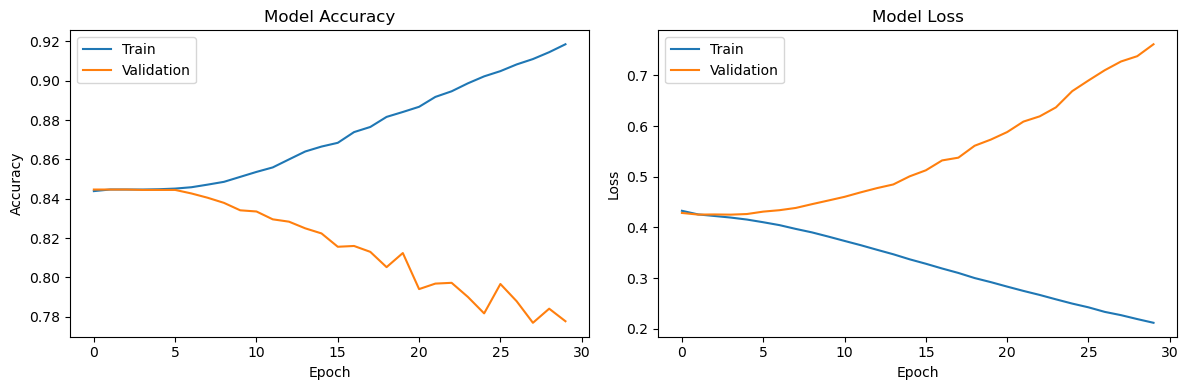

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()